In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import json
import numpy as np
from scipy.io import wavfile
import librosa
import pysynth
import pysynth_b
import pysynth_e

Piano key frequencies (for equal temperament):
Key number	Scientific name	Frequency (Hz)
         1	             A0	         27.50
         2	            A#0	         29.14
         3	             B0	         30.87
         4	             C1	         32.70
         5	            C#1	         34.65
         6	             D1	         36.71
         7	            D#1	         38.89
         8	             E1	         41.20
         9	             F1	         43.65
        10	            F#1	         46.25
        11	             G1	         49.00
        12	            G#1	         51.91
        13	             A1	         55.00
        14	            A#1	         58.27
        15	             B1	         61.74
        16	             C2	         65.41
        17	            C#2	         69.30
        18	             D2	         73.42
        19	            D#2	         77.78
        20	             E2	         82.41
        21	             F2	         87.31
        22	            F#2	  

41884


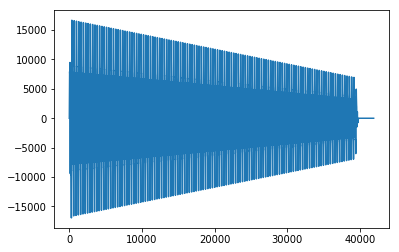

In [2]:
with open('metadata.json') as json_file:  
    metadata = json.load(json_file)
file = metadata['files'][0]['name']
fs, data = wavfile.read(file)
print(len(data))
plt.plot(list(range(len(data))),data)
plt.show()

In [3]:

with open('metadata.json') as json_file:  
    metadata = json.load(json_file)
notes = ['a0', 'a#0', 'b0', 'c1', 'c#1', 'd1', 'd#1', 'e1', 'f1', 'f#1', 'g1', 'g#1', 'a1', 'a#1', 'b1', 'c2', 'c#2', 'd2', 'd#2', 'e2', 'f2', 'f#2', 'g2', 'g#2', 'a2', 'a#2', 'b2', 'c3', 'c#3', 'd3', 'd#3', 'e3', 'f3', 'f#3', 'g3', 'g#3', 'a3', 'a#3', 'b3', 'c4', 'c#4', 'd4', 'd#4', 'e4', 'f4', 'f#4', 'g4', 'g#4', 'a4', 'a#4', 'b4', 'c5', 'c#5', 'd5', 'd#5', 'e5', 'f5', 'f#5', 'g5', 'g#5', 'a5', 'a#5', 'b5', 'c6', 'c#6', 'd6', 'd#6', 'e6', 'f6', 'f#6', 'g6', 'g#6', 'a6', 'a#6', 'b6', 'c7', 'c#7', 'd7', 'd#7', 'e7', 'f7', 'f#7', 'g7', 'g#7', 'a7', 'a#7', 'b7', 'c8']
dic ={}
for i in range(len(notes)):
    dic[notes[i]]=i
X = np.zeros((len(metadata['files']),44101))
Y = np.zeros((len(metadata['files']),2))
for i in range(len(metadata['files'])):
    file = metadata['files'][i]['name']
    fs, data = wavfile.read(file)
    X[i][0] = ord(metadata['files'][i]['synth'][-1])-97
    if(len(data)>=44100):
        X[i][1:] = data[:44100]
    else:
        X[i][1:] = np.array(list(data[:])+[0]*(44100-len(data)))
    note = dic[metadata['files'][i]['notes'][0]]
    dur = metadata['files'][i]['dur']
    Y[i][0]=note
    Y[i][1]=dur
    

In [68]:
dic2 = {}
for i in range(len(notes)):
    dic2[i]=notes[i]
print(len(notes))
dic2

88


{0: 'a0',
 1: 'a#0',
 2: 'b0',
 3: 'c1',
 4: 'c#1',
 5: 'd1',
 6: 'd#1',
 7: 'e1',
 8: 'f1',
 9: 'f#1',
 10: 'g1',
 11: 'g#1',
 12: 'a1',
 13: 'a#1',
 14: 'b1',
 15: 'c2',
 16: 'c#2',
 17: 'd2',
 18: 'd#2',
 19: 'e2',
 20: 'f2',
 21: 'f#2',
 22: 'g2',
 23: 'g#2',
 24: 'a2',
 25: 'a#2',
 26: 'b2',
 27: 'c3',
 28: 'c#3',
 29: 'd3',
 30: 'd#3',
 31: 'e3',
 32: 'f3',
 33: 'f#3',
 34: 'g3',
 35: 'g#3',
 36: 'a3',
 37: 'a#3',
 38: 'b3',
 39: 'c4',
 40: 'c#4',
 41: 'd4',
 42: 'd#4',
 43: 'e4',
 44: 'f4',
 45: 'f#4',
 46: 'g4',
 47: 'g#4',
 48: 'a4',
 49: 'a#4',
 50: 'b4',
 51: 'c5',
 52: 'c#5',
 53: 'd5',
 54: 'd#5',
 55: 'e5',
 56: 'f5',
 57: 'f#5',
 58: 'g5',
 59: 'g#5',
 60: 'a5',
 61: 'a#5',
 62: 'b5',
 63: 'c6',
 64: 'c#6',
 65: 'd6',
 66: 'd#6',
 67: 'e6',
 68: 'f6',
 69: 'f#6',
 70: 'g6',
 71: 'g#6',
 72: 'a6',
 73: 'a#6',
 74: 'b6',
 75: 'c7',
 76: 'c#7',
 77: 'd7',
 78: 'd#7',
 79: 'e7',
 80: 'f7',
 81: 'f#7',
 82: 'g7',
 83: 'g#7',
 84: 'a7',
 85: 'a#7',
 86: 'b7',
 87: 'c8'}

In [4]:
from sklearn.utils import shuffle
#X, Y = shuffle(X, Y, random_state=0)
print(X.shape,Y.shape)
Xtr, Xte, ytr, yte = train_test_split(X, Y, test_size = 0.2, random_state = 42)

(600, 44101) (600, 2)


In [5]:
from sklearn.neural_network import MLPClassifier,MLPRegressor
mlc = MLPClassifier()
mlr = MLPRegressor()

print("1")

mlc.fit(Xtr,ytr[:,0])
print("2")
mlr.fit(Xtr,ytr[:,1])

print("3")

print(mlc.score(Xte[:10],yte[:10,0]))
print(mlr.score(Xte[:10],yte[:10,1]))


1
2
3
1.0
-810156.6642665984


In [72]:
print(mlc.score(Xte,yte[:,0]))
print(mlr.score(Xte,yte[:,1]))

0.9916666666666667
-13484591.088734666


In [73]:
print(mlc.predict([[0]+list(np.random.randn(44100))]))

[36.]


[  1536  11776  15360  28672  29696  43008  57344  84992  95232  98816
 112640 126464 140288 167424 168448 175616 182272 203264 210432 223744
 250880 252416 262144 266240 279552 293376 307200 321024 322048]


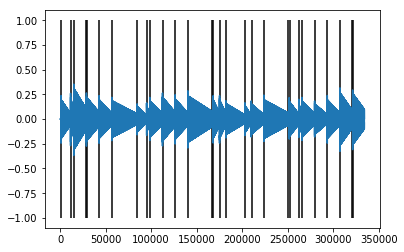

In [74]:
file = 'pysynth_anthem.wav'
arr , fs = librosa.load(file)
onset = librosa.onset.onset_detect(y = arr, sr = fs, units = 'samples')
print(onset)
plt.plot(list(range(len(arr))),arr)
plt.vlines(onset,-1,1)
plt.show()

In [77]:
ans = []
for i in range(len(onset)-1):
    t = arr[onset[i]:onset[i+1]]
    if(len(t)>=44100):
        #temp = np.array([0] + list(t[:44100]))
        temp = [1] + list(np.random.randn(44100))
    else:
         #temp = np.array([0] + list(t) + [0]*(44100-len(t)))
        temp = [0] + list(np.random.randn(44100))
            
    #plt.plot(list(range(len(temp))),temp)
    #plt.show()
    
    pred_note = mlc.predict([temp])
    pred_dur = mlr.predict([temp])
    ans.append([pred_note[0],pred_dur[0]])
    
print(ans)

[[42.0, 2.0781571140291284], [33.0, -1.2299872452056486], [26.0, 1.2743839753872042], [84.0, -0.9877830387032996], [42.0, -0.09853833246993708], [42.0, -0.7200047158158466], [60.0, -1.8115844112646193], [50.0, -3.634537435136843], [3.0, -1.9368541718598113], [50.0, 2.621135464692774], [23.0, -1.1152892081737555], [14.0, -3.1513676351162134], [71.0, -3.4514689829785516], [49.0, 4.006526128074118], [49.0, 1.1946509241520333], [60.0, 0.43371730877442544], [23.0, -0.13376582268740894], [42.0, 0.5777911756985773], [3.0, -2.6112204437235667], [79.0, -3.2887823944083827], [42.0, -1.9021384257553182], [14.0, -0.1336505890446934], [50.0, -0.4794246414019194], [79.0, -0.6094511115261708], [57.0, -0.8784780749511357], [49.0, -0.49277649139380564], [50.0, -2.3240167512076657], [81.0, -2.5496188256056938]]


In [80]:
final = []
for i in range(len(ans)):
    final.append(tuple([dic2[int(ans[i][0])],ans[i][1]]))

In [81]:
print(final)

[('d#4', 2.0781571140291284), ('f#3', -1.2299872452056486), ('b2', 1.2743839753872042), ('a7', -0.9877830387032996), ('d#4', -0.09853833246993708), ('d#4', -0.7200047158158466), ('a5', -1.8115844112646193), ('b4', -3.634537435136843), ('c1', -1.9368541718598113), ('b4', 2.621135464692774), ('g#2', -1.1152892081737555), ('b1', -3.1513676351162134), ('g#6', -3.4514689829785516), ('a#4', 4.006526128074118), ('a#4', 1.1946509241520333), ('a5', 0.43371730877442544), ('g#2', -0.13376582268740894), ('d#4', 0.5777911756985773), ('c1', -2.6112204437235667), ('e7', -3.2887823944083827), ('d#4', -1.9021384257553182), ('b1', -0.1336505890446934), ('b4', -0.4794246414019194), ('e7', -0.6094511115261708), ('f#5', -0.8784780749511357), ('a#4', -0.49277649139380564), ('b4', -2.3240167512076657), ('f#7', -2.5496188256056938)]


In [82]:
pysynth.make_wav(tuple(final), fn = "deb2.wav")

Writing to file deb2.wav
[1/28]	
[5/28]	


KeyboardInterrupt: 

In [83]:
print(ytr[:,1])

[3.42505433 3.48517867 2.58837644 3.36257543 4.38644608 4.43447313
 1.90120925 3.2068574  2.00947989 2.03314305 1.46067359 2.98499486
 3.30077793 2.03314305 1.23872325 1.2454027  2.04602028 4.97784278
 2.83750108 1.42105629 3.98364261 3.92608688 3.67693174 1.28952492
 3.25130893 3.19241166 4.54142157 4.90134026 3.1771535  1.82251039
 2.83750108 4.03753203 2.61319995 3.50474337 3.67693174 1.05723861
 1.2362576  4.777048   1.15883395 2.19168912 2.21019605 3.17180232
 3.83127569 2.02351792 1.84296023 3.07080686 2.8733271  4.97784278
 2.19168912 3.86513543 2.25047568 2.01024764 4.52267878 4.77847887
 1.2362576  2.56470616 3.2068574  4.94376489 1.41520868 2.22089863
 2.19915855 2.23622799 2.61838691 4.19379569 3.86513543 2.61838691
 3.50474337 4.66812706 1.62675709 3.03576729 2.26873698 4.96018329
 3.03576729 1.84296023 4.13267452 1.73857996 2.61154314 4.90134026
 2.70545746 2.59181119 3.42411287 3.36257543 4.64191226 2.13790697
 1.54203551 4.777048   1.95013258 1.5451881  1.83669335 1.6952